In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import os

Note: 
- source data are from ResultsChartTORedo_withoutpath.csv and ResultsChartTORedo_withpath.csv (which are copied from ./Analysis/Results/Spreadsheets/ResultsChartTORedo.xlsx)
- The estimations in ResultsChartTORedo.xlsx are from ./Analysis/Progs/Stata/Tables2-3.do

In [ ]:
# print(os.getcwd())


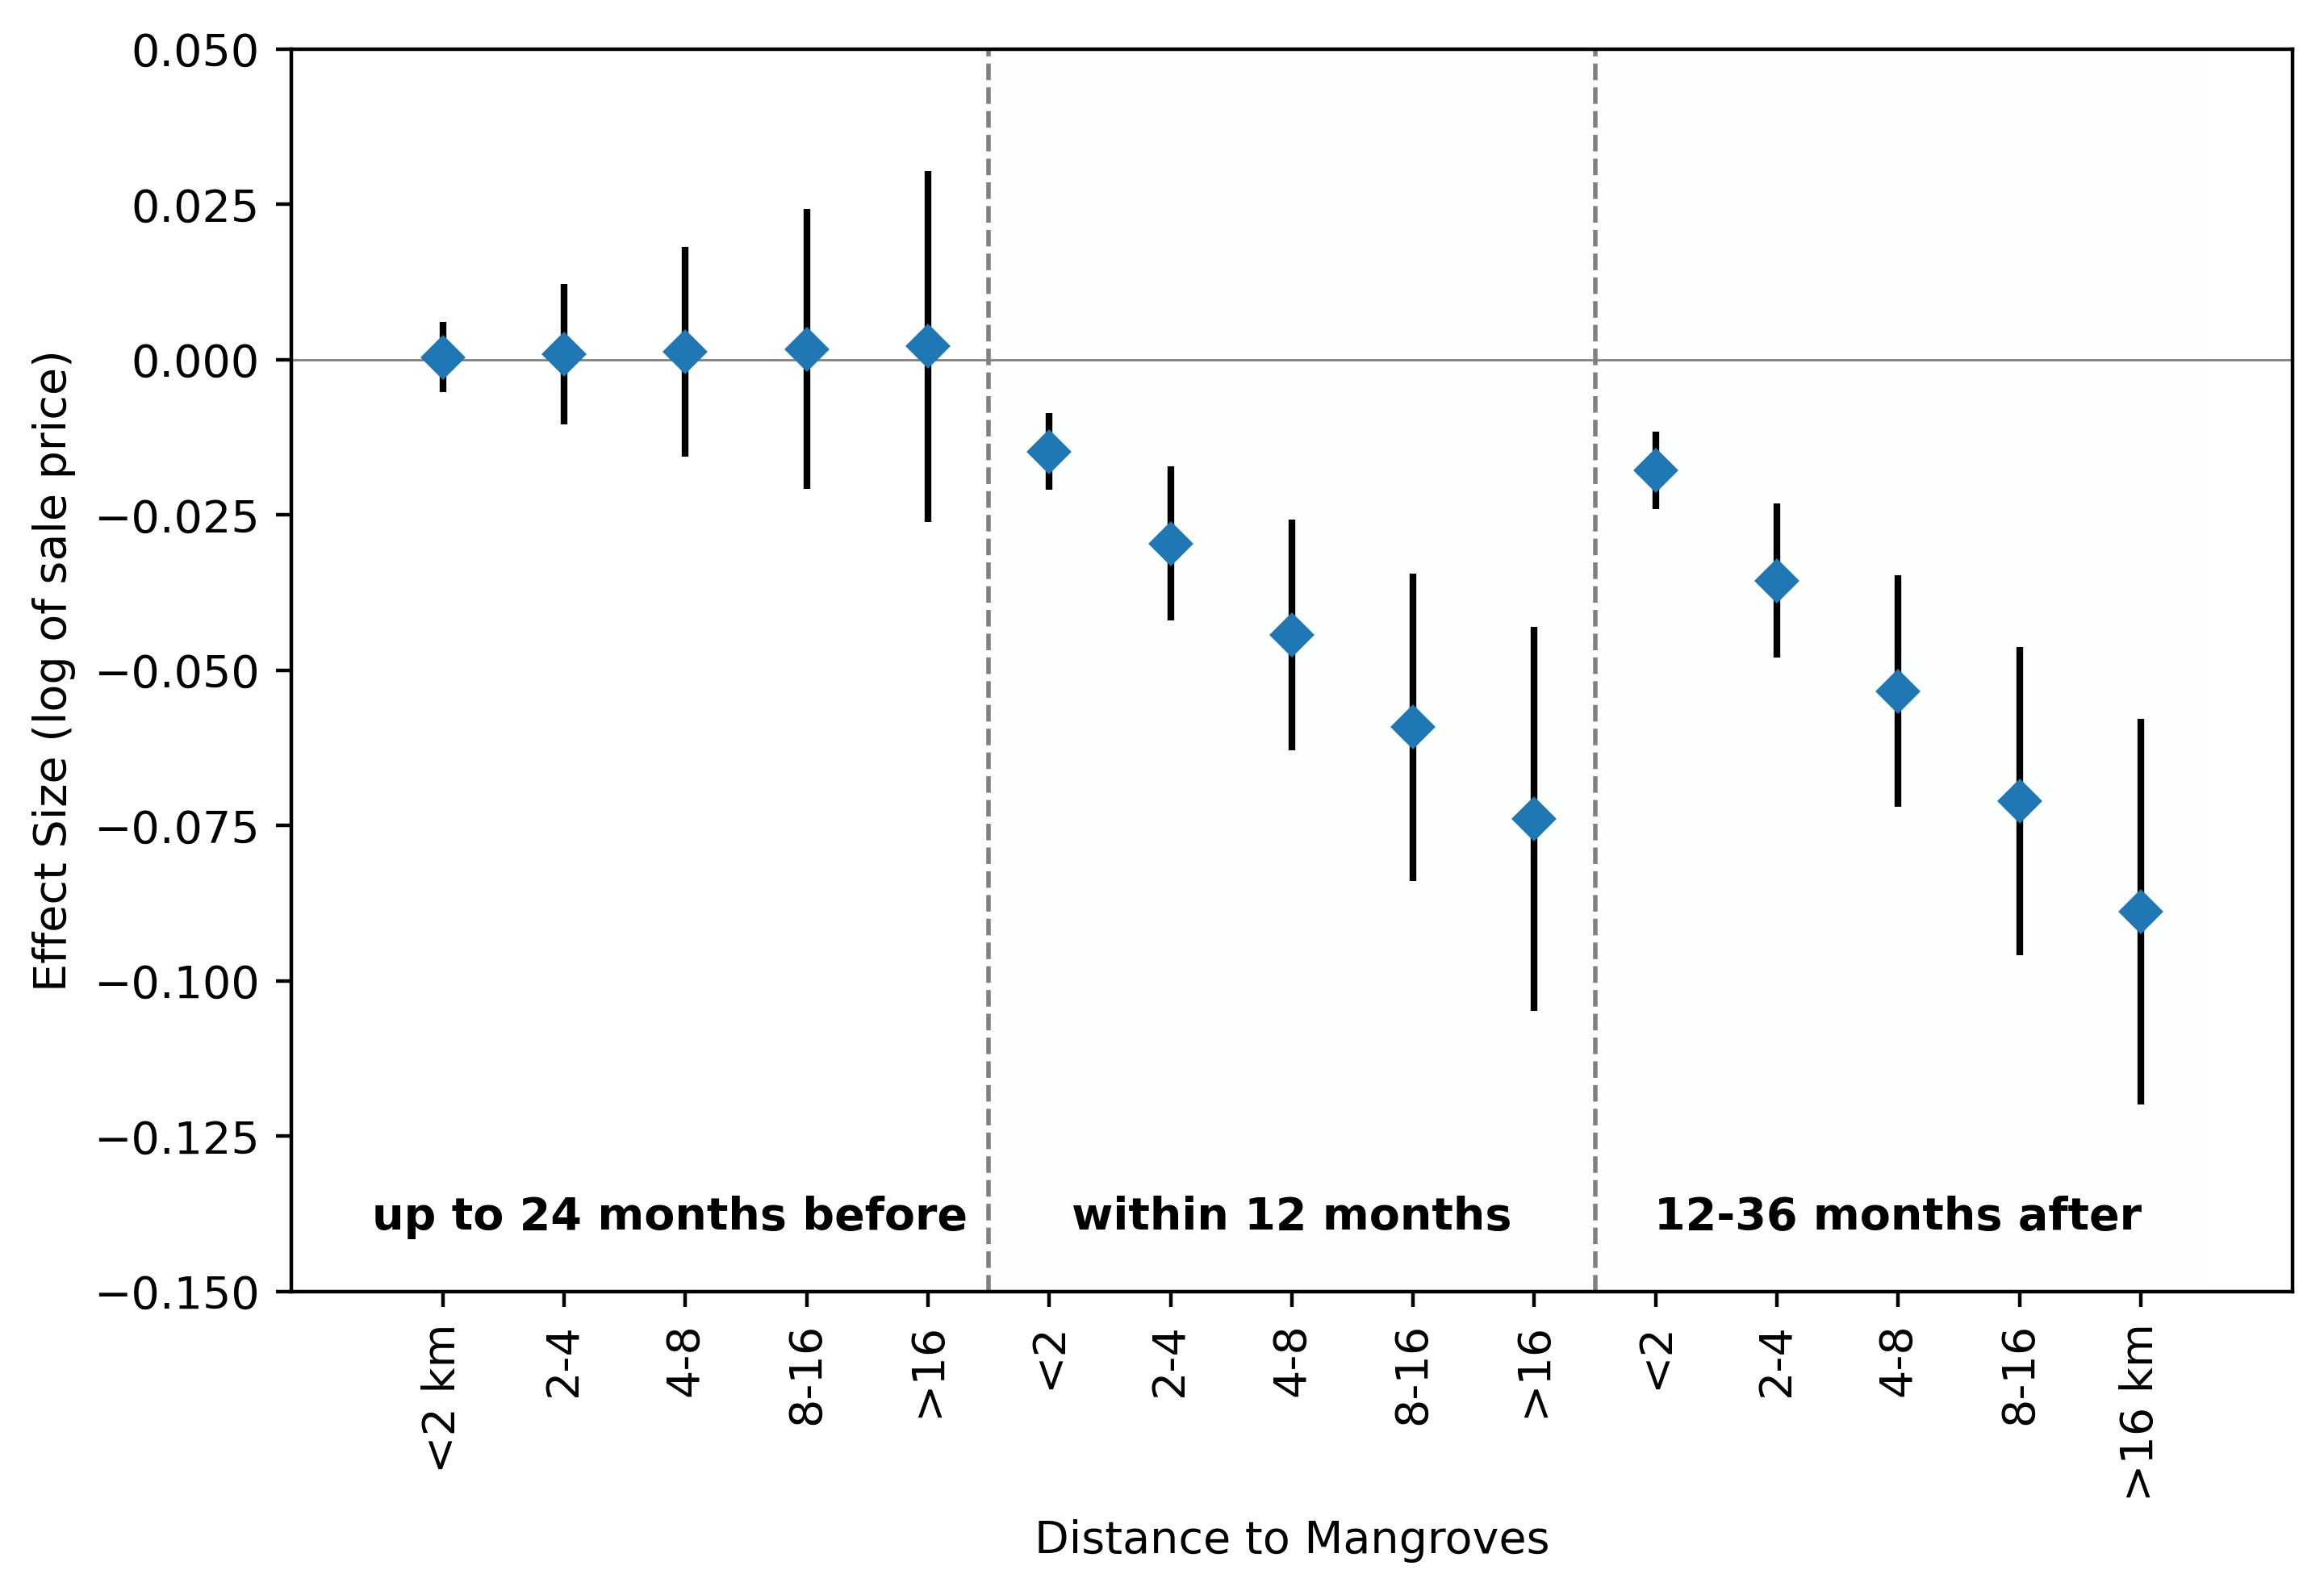

In [4]:
# Load the CSV file
file_path = "../../Results/Spreadsheets/ResultsChartTORedo_withoutpath.csv"  
df = pd.read_csv(file_path) 

# Extract the relevant data
categories = df.iloc[0, 1:].values  # Skip the first unnamed column
y_values = df.iloc[1, 1:].astype(float).values  # Effect sizes
y_errors_low = df.iloc[2, 1:].astype(float).values  # Lower bound of confidence interval
y_errors_high = df.iloc[3, 1:].astype(float).values  # Upper bound of confidence interval

# Compute symmetric error bars
y_errors = [(y_errors_high - y_values), (y_values - y_errors_low)]

# Create x-axis positions
x_pos = np.arange(len(categories))

# Define the number of sections dynamically
num_sections = 3
section_size = len(categories) // num_sections

# Modify category labels: add "km" only to the first and last entries
categories_km = categories.copy()
categories_km[0] = "<2 km"
categories_km[-1] = ">16 km"

# Create the plot with subtle green shading and updated labels
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

# Plot error bars
ax.errorbar(x_pos, y_values, yerr=y_errors, fmt='D', color='tab:blue', ecolor='black', capsize=0)

# Formatting
ax.set_xticks(x_pos)
ax.set_xticklabels(categories_km, rotation=90, ha='center', fontsize=10)
ax.axhline(y=0, color='gray', linewidth=0.5)

# Further toned-down green shades for time periods
ax.axvspan(-0.5, section_size - 0.5, color='white', alpha=0.0, label="up to 24 months before")  # No shading
ax.axvspan(section_size - 0.5, 2 * section_size - 0.5, color='honeydew', alpha=0.15, label="within 12 months")  # Very light green
ax.axvspan(2 * section_size - 0.5, len(categories) - 0.5, color='mintcream', alpha=0.2, label="12-36 months after")  # Even lighter green

# Add vertical separator lines between the three time periods
ax.axvline(x=section_size - 0.5, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=2 * section_size - 0.5, color='gray', linestyle='--', linewidth=1)

 

# Add text annotations
ax.text(section_size // 2, -0.14, "up to 24 months before  ", ha='center', fontsize=10, fontweight='bold')
ax.text(section_size + section_size // 2, -0.14, "within 12 months", ha='center', fontsize=10, fontweight='bold')
ax.text(2 * section_size + section_size // 2, -0.14, "12-36 months after", ha='center', fontsize=10, fontweight='bold')

# Set limits and labels
ax.set_ylim(-0.15, 0.05)
ax.set_ylabel("Effect Size (log of sale price)")
ax.set_xlabel("Distance to Mangroves")

# Remove unnecessary grid lines
ax.grid(False)

# Show plot
plt.savefig('../../Results/Figures/benchmark_withoutpath.png', dpi=500, bbox_inches='tight')

plt.show()

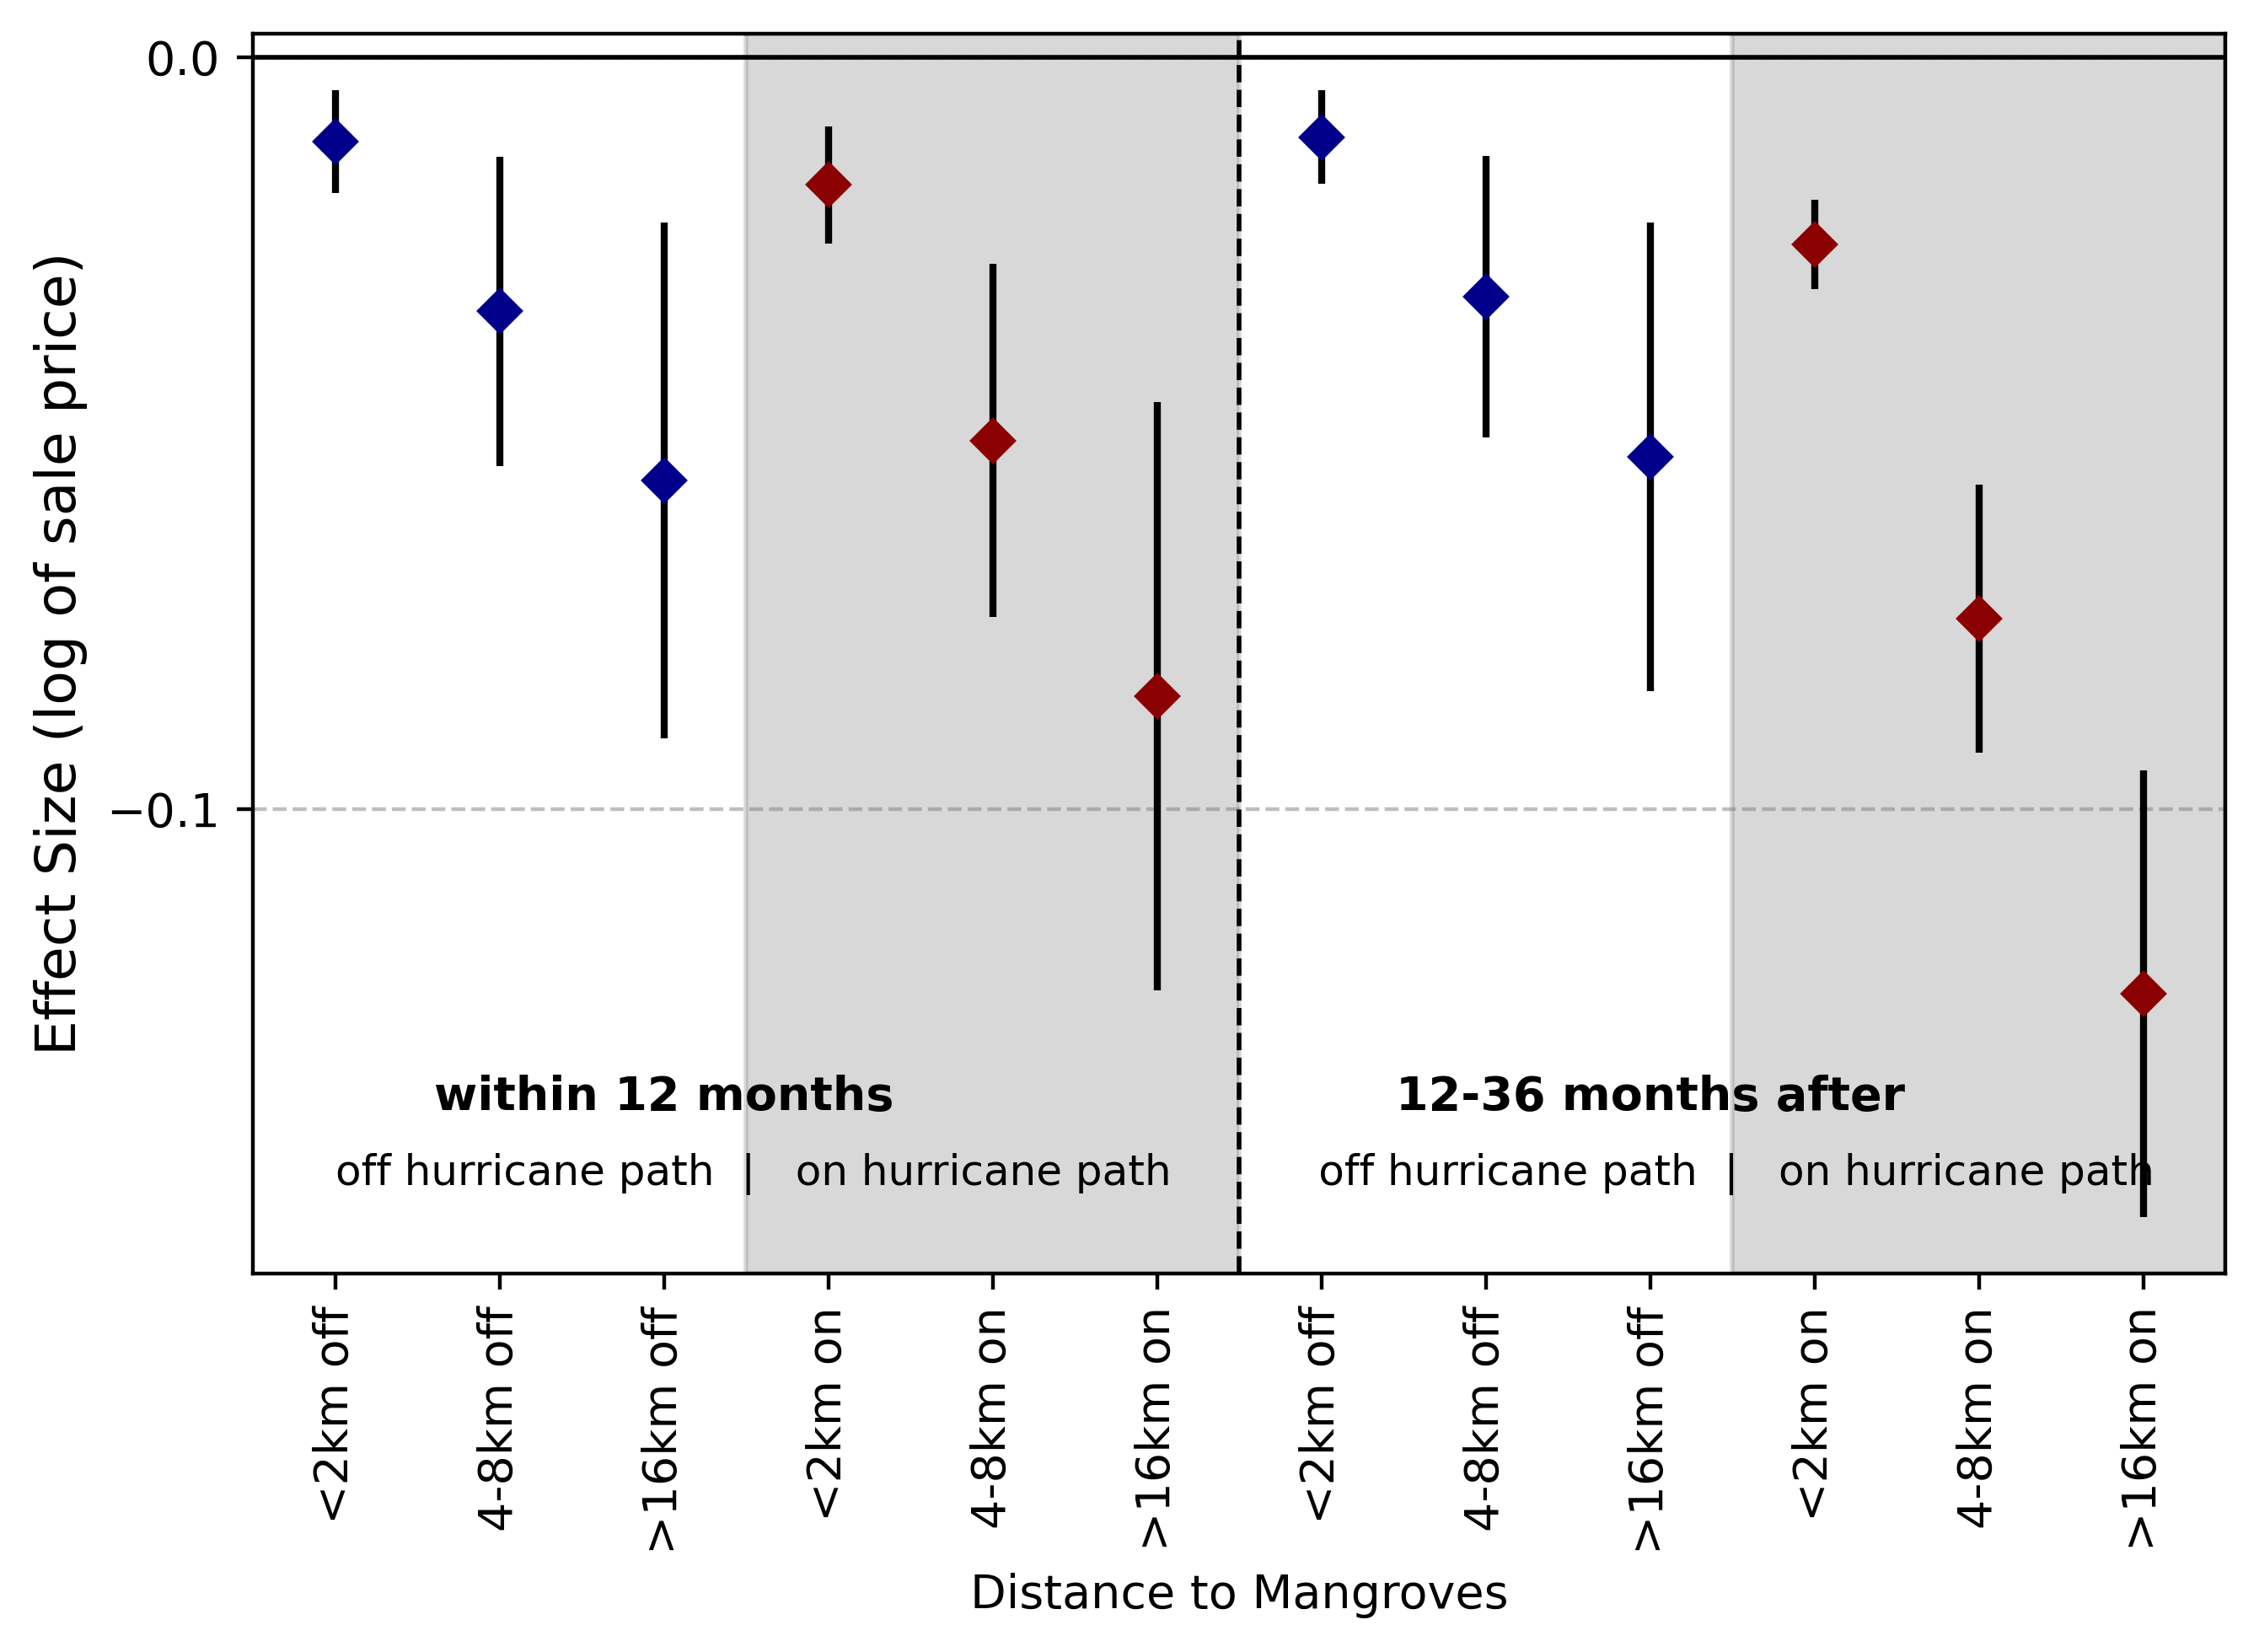

In [ ]:
import matplotlib.patches as mpatches

# Load the CSV file
def load_data(file_path):
    df_csv = pd.read_csv(file_path)
    
    # Convert effect sizes and standard errors to numeric values
    df_csv_numeric = df_csv.apply(pd.to_numeric, errors='coerce')
    
    # Define the time periods and distance categories
    time_periods = ["within 12 months", "12-36 months after"]
    distance_categories = ["<2km off", "4-8km off", ">16km off", "<2km on", "4-8km on", ">16km on"]
    
    # Extract effect sizes (row index 1 corresponds to effect sizes)
    effect_sizes = df_csv_numeric.iloc[1, 1:].values
    
    # Extract standard errors if available (row index 2 might correspond to lower bound)
    standard_errors = (df_csv_numeric.iloc[3, 1:].values - df_csv_numeric.iloc[2, 1:].values) / 2
    
    # Flatten category and time labels
    categories = []
    time_labels = []
    
    for period in time_periods:
        categories.extend(distance_categories)
        time_labels.extend([period] * len(distance_categories))
    
    # Create a clean dataframe
    df_clean = pd.DataFrame({
        "Category": categories,
        "Time Period": time_labels,
        "Effect Size": effect_sizes,
        "Error": standard_errors
    })
    
    return df_clean, time_periods, distance_categories

# Path to CSV file
file_path = "../../Results/Spreadsheets/ResultsChartTORedo_withpath2.csv"

df, time_periods, distance_categories = load_data(file_path)

# **Tightened x-axis positions**
group_spacing = 0   # Reduce space between time periods
on_off_spacing = 0   # Bring "on" and "off" results closer

x_positions = []
current_x = 0

for time_period in time_periods:
    base_positions = np.arange(current_x, current_x + len(distance_categories))
    
    for i, category in enumerate(distance_categories):
        if "on" in category:
            x_positions.append(base_positions[i] + on_off_spacing)  # Shift "on path" closer
        else:
            x_positions.append(base_positions[i])
    
    current_x += len(distance_categories) + group_spacing  # Minimize space between periods

# **Define colors for on/off hurricane path results**
off_path_color = 'darkblue'
on_path_color = 'darkred'
colors = [on_path_color if "on" in cat else off_path_color for cat in df["Category"]]

# **Plot the refined graph**
fig, ax = plt.subplots(figsize=(8, 5),dpi=400)  # Adjust figure size


# Identify "on path" indices
on_path_indices = df[df["Category"].str.contains("on")].index.tolist()

# **Find continuous blocks of "on path" indices**
for key, group in itertools.groupby(enumerate(on_path_indices), lambda i_x: i_x[0] - i_x[1]):
    block = list(map(lambda x: x[1], group))
    ax.axvspan(block[0] - 0.5, block[-1] + 0.5, color='gray', alpha=0.3, label="_nolegend_")  # Shade entire block
    ax.axvline(block[0] - 0.5, block[-1] + 0.5, color='darkgray', linewidth=1)

# **Set meaningful horizontal grid lines**
y_ticks = np.arange(-0.3, 0.3, 0.1)  # Grid at -0.3, -0.2, -0.1, 0, 0.1, etc.
ax.set_yticks(y_ticks)
ax.yaxis.grid(True, linestyle='dashed', alpha=0.5, color='gray')

# **Plot effect sizes with error bars, using different colors for on/off path**
for x, y, err, color in zip(x_positions, df["Effect Size"], df["Error"], colors):
    ax.errorbar(x, y, yerr=err, fmt='D', color=color, ecolor='black', capsize=0)

# **Remove extra blank space on x-axis**
ax.set_xlim(min(x_positions) - 1, max(x_positions) + 1)


# Plot each category as a scatter plot with error bars
#ax.errorbar(range(len(df)), df["Effect Size"], yerr=df["Error"], fmt='o', color='darkblue', ecolor='black', capsize=0, label="Effect Size")

# Add a horizontal line at 0 for reference
ax.axhline(y=0, color='black', linewidth=1)

# **Set x-axis limits to remove extra space after last label**
ax.set_xlim(-0.5, len(df) - 0.5)

# **Set x-axis labels to be vertical for better readability**
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df["Category"], rotation=90, ha='center', fontsize=10)

ax.set_ylabel("Effect Size (log of sale price)", fontsize=12)

# **Dashed Vertical Lines to Separate Time Periods**
boundaries = [len(distance_categories) * i for i in range(1, len(time_periods))]
for boundary in boundaries:
    ax.axvline(x=boundary - 0.5, color='black', linestyle='dashed', linewidth=1)

# **Move Time Period Labels Slightly Higher for Better Spacing**
#for i, boundary in enumerate([0] + boundaries):
 #   center_x = (boundary + (boundaries[i] if i < len(boundaries) else len(df))) / 2
  #  ax.text(center_x, max(df["Effect Size"]) + 0.08, time_periods[i], 
   #         horizontalalignment='center', verticalalignment='bottom', 
    #        fontsize=9.5, fontweight='bold')

num_sections = 2
section_size = len(distance_categories) // num_sections

# Add text annotations
#ax.text((section_size + 1)// 2, -0.22, "up to 24 months before", ha='center', fontsize=10, fontweight='bold')
ax.text( (section_size + 1) // 2, -0.14, "within 12 months", ha='center', fontsize=10, fontweight='bold')
ax.text(2 * section_size + (section_size + 2)// 2, -0.14, "12-36 months after", ha='center', fontsize=10, fontweight='bold')

ax.text((section_size + 1) // 5, -0.15, "off hurricane path  |   on hurricane path           off hurricane path  |   on hurricane path  ", ha='left', fontsize=9, fontweight='medium')

# **Add legend for shaded areas**
hurricane_patch = mpatches.Patch(color='lightgray', alpha=0.3, label="On Hurricane Path")
#legend = ax.legend(handles=[hurricane_patch], loc='lower left', fontsize=12)
ax.set_xlabel("Distance to Mangroves")

# Adjust layout to accommodate the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right
#plt.legend(loc="upper right")

plt.savefig('../../Results/Figures/benchmark_withpath.png', dpi=500, bbox_inches='tight')

plt.show()


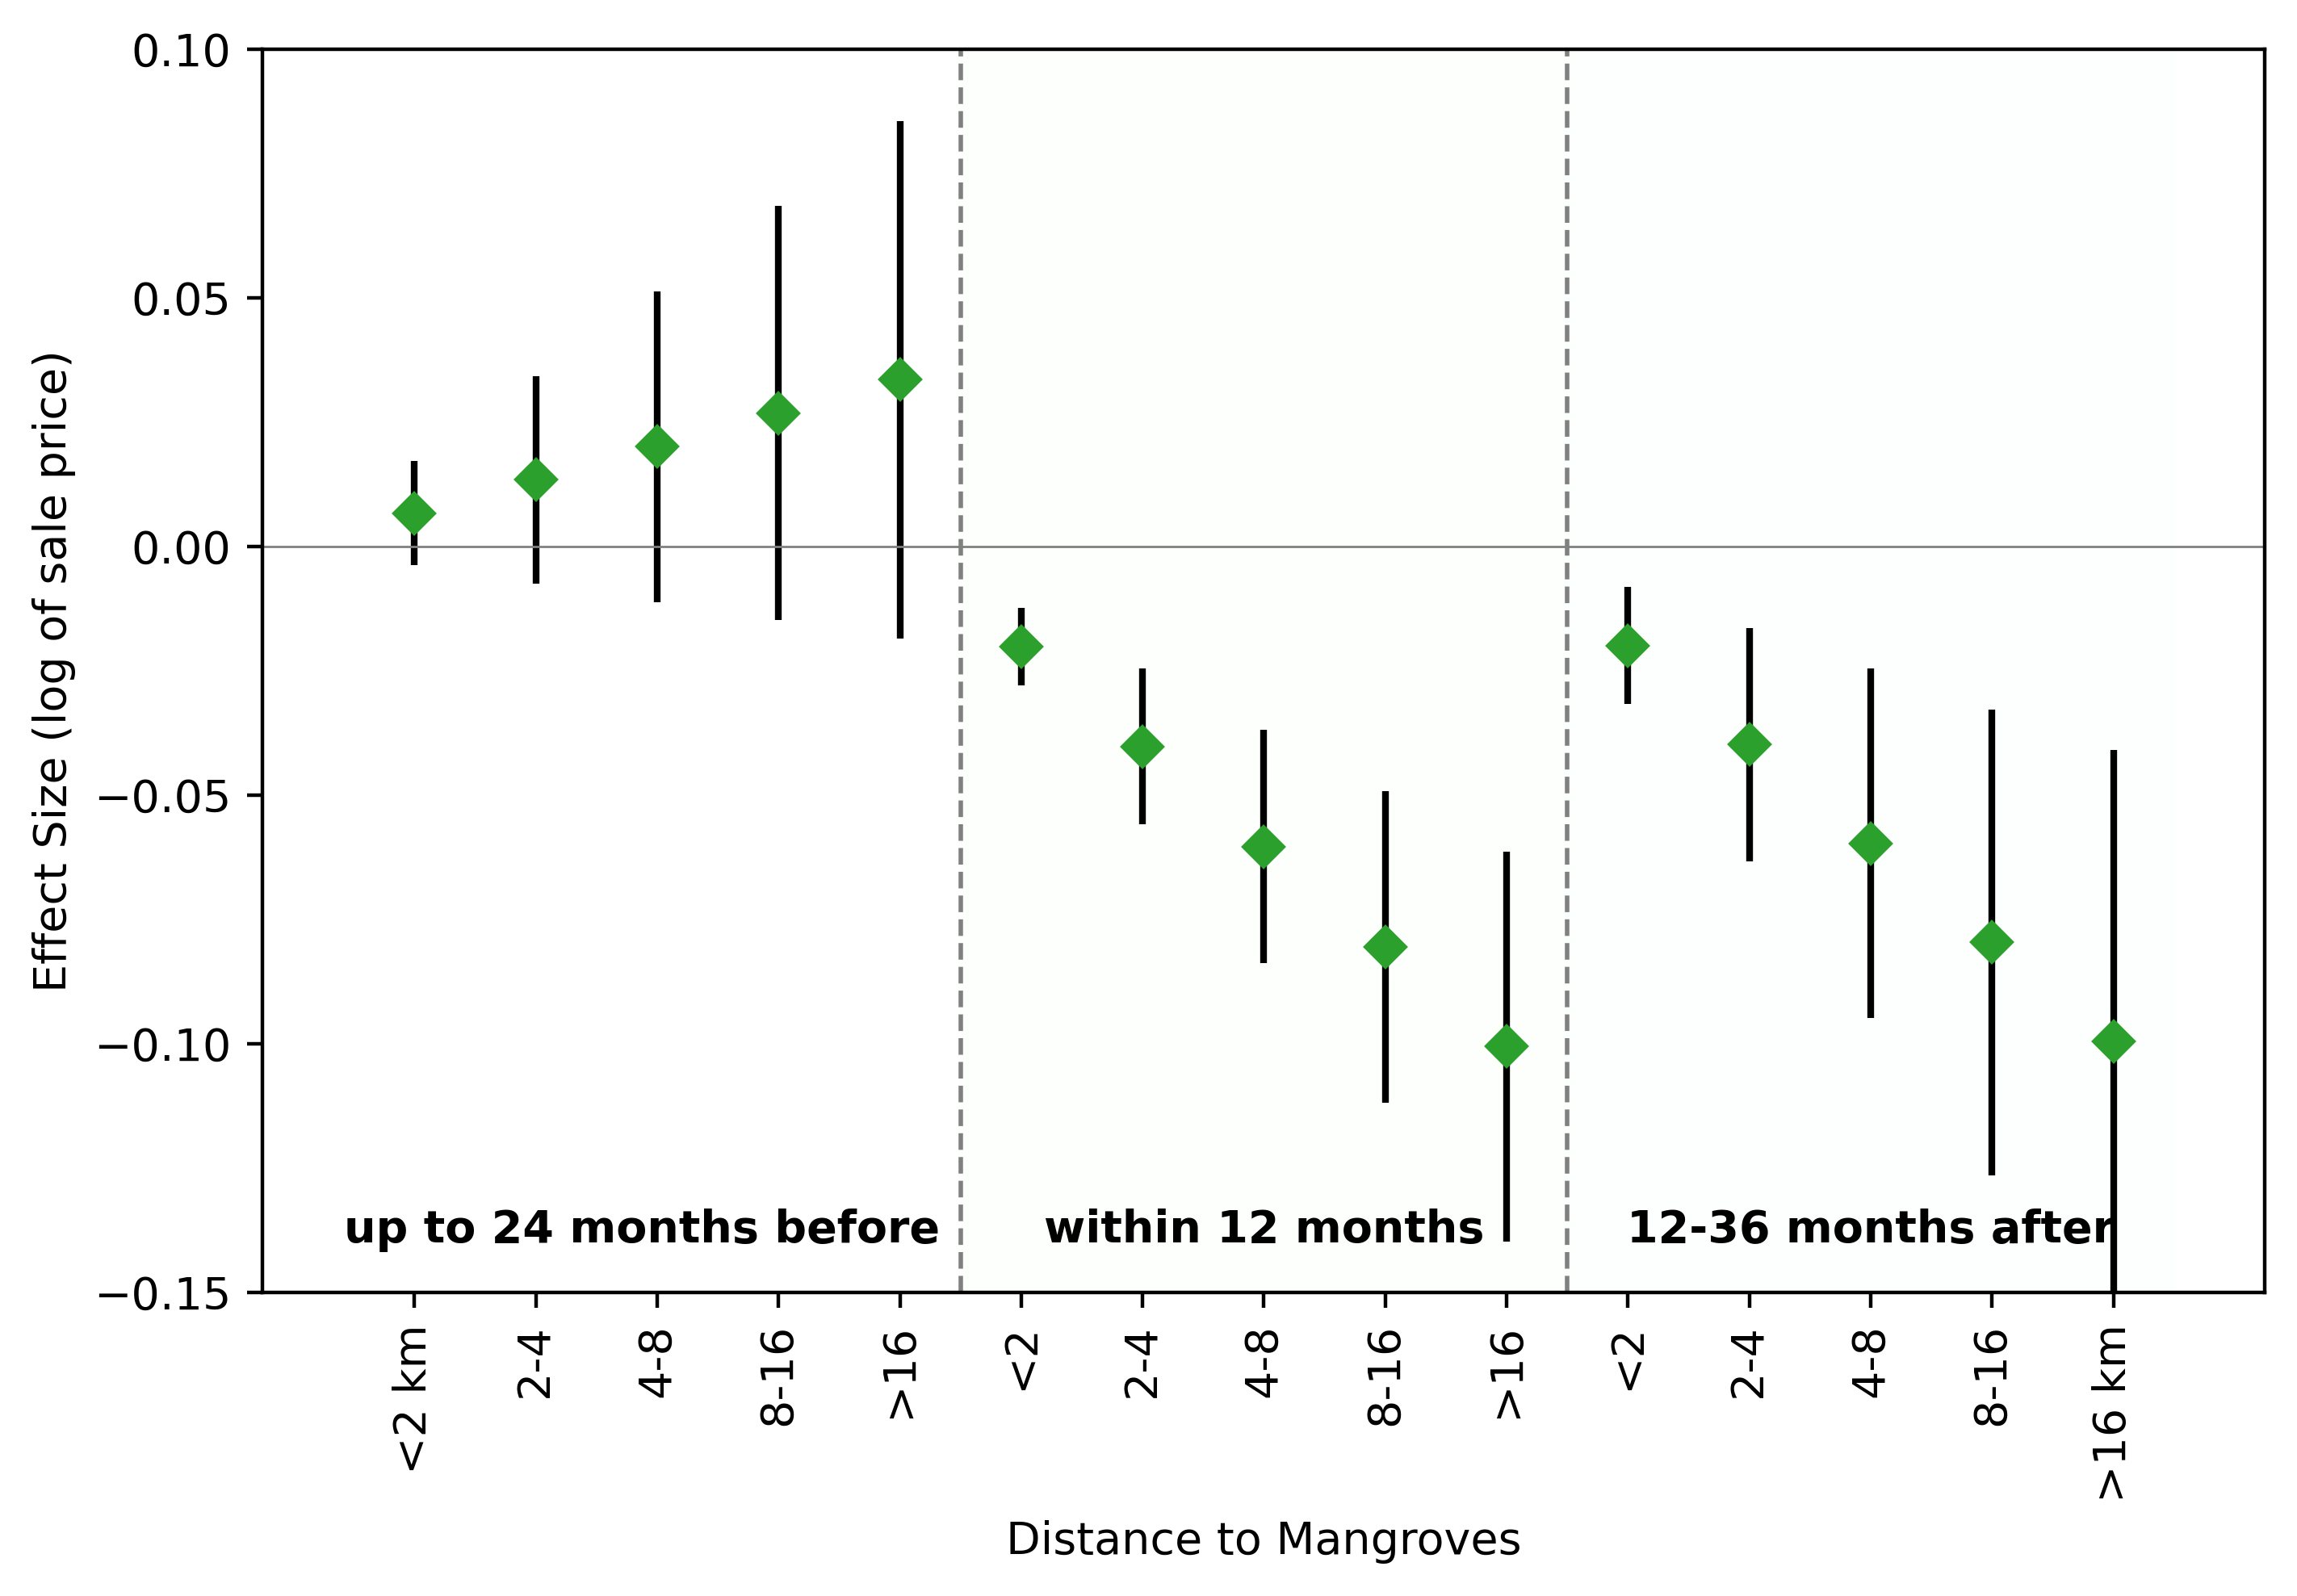

In [10]:
# Load the CSV file
file_path = "../../Results/Spreadsheets/ortho_nopath.csv"  
df = pd.read_csv(file_path) 

# Extract the relevant data
categories = df.iloc[0, 1:].values  # Skip the first unnamed column
y_values = df.iloc[1, 1:].astype(float).values  # Effect sizes
y_errors_low = df.iloc[2, 1:].astype(float).values  # Lower bound of confidence interval
y_errors_high = df.iloc[3, 1:].astype(float).values  # Upper bound of confidence interval

# Compute symmetric error bars
y_errors = [(y_errors_high - y_values), (y_values - y_errors_low)]

# Create x-axis positions
x_pos = np.arange(len(categories))

# Define the number of sections dynamically
num_sections = 3
section_size = len(categories) // num_sections

# Modify category labels: add "km" only to the first and last entries
categories_km = categories.copy()
categories_km[0] = "<2 km"
categories_km[-1] = ">16 km"

# Create the plot with subtle green shading and updated labels
fig, ax = plt.subplots(figsize=(8, 5), dpi=400)

# Plot error bars
ax.errorbar(x_pos, y_values, yerr=y_errors, fmt='D', color='tab:green', ecolor='black', capsize=0)

# Formatting
ax.set_xticks(x_pos)
ax.set_xticklabels(categories_km, rotation=90, ha='center', fontsize=10)
ax.axhline(y=0, color='gray', linewidth=0.5)

# Further toned-down green shades for time periods
ax.axvspan(-0.5, section_size - 0.5, color='white', alpha=0.0, label="up to 24 months before")  # No shading
ax.axvspan(section_size - 0.5, 2 * section_size - 0.5, color='honeydew', alpha=0.15, label="within 12 months")  # Very light green
ax.axvspan(2 * section_size - 0.5, len(categories) - 0.5, color='mintcream', alpha=0.2, label="12-36 months after")  # Even lighter green

# Add vertical separator lines between the three time periods
ax.axvline(x=section_size - 0.5, color='gray', linestyle='--', linewidth=1)
ax.axvline(x=2 * section_size - 0.5, color='gray', linestyle='--', linewidth=1)

 

# Add text annotations
ax.text(section_size // 2, -0.14, "up to 24 months before  ", ha='center', fontsize=10, fontweight='bold')
ax.text(section_size + section_size // 2, -0.14, "within 12 months", ha='center', fontsize=10, fontweight='bold')
ax.text(2 * section_size + section_size // 2, -0.14, "12-36 months after", ha='center', fontsize=10, fontweight='bold')

# Set limits and labels
ax.set_ylim(-0.15, 0.1)
ax.set_ylabel("Effect Size (log of sale price)")
ax.set_xlabel("Distance to Mangroves")

# Remove unnecessary grid lines
ax.grid(False)

# Show plot
plt.savefig('../../Results/Figures/ortho_nopath.png', dpi=500, bbox_inches='tight')

plt.show()